In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from scipy import stats

In [2]:
df = pd.read_csv(r'C:\Users\berrin.gocer\Downloads\Salary_Data.csv')
df = pd.DataFrame(df)
df.head(2)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0


In [3]:
df.dropna(axis=0, inplace=True)

In [4]:
### # HYPOTESIS: Female, on average, earn less than male.

## Female Data

In [5]:
female_df = df.loc[df['Gender'] == 'Female', ['Gender', 'Salary']].copy()

In [6]:
female_df.head(2)

,Gender,Salary
1,Female,65000.0
3,Female,60000.0


## Male Data

In [7]:
male_df = df.loc[df['Gender'] == 'Male', ['Gender', 'Salary']].copy()

In [8]:
male_df.head(2)

,Gender,Salary
0,Male,90000.0
2,Male,150000.0


### To check the average salary for Female and Male

In [9]:
np.mean(female_df["Salary"])

107888.99867241952

In [10]:
np.mean(male_df["Salary"])

121395.69763007356

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
all_gender = pd.concat([female_df,male_df])
print(all_gender)

      Gender    Salary
1     Female   65000.0
3     Female   60000.0
6     Female  120000.0
8     Female   45000.0
11    Female  140000.0
...      ...       ...
6694    Male   40000.0
6696    Male   55000.0
6698    Male   75000.0
6700    Male   50000.0
6702    Male  140000.0

[6684 rows x 2 columns]


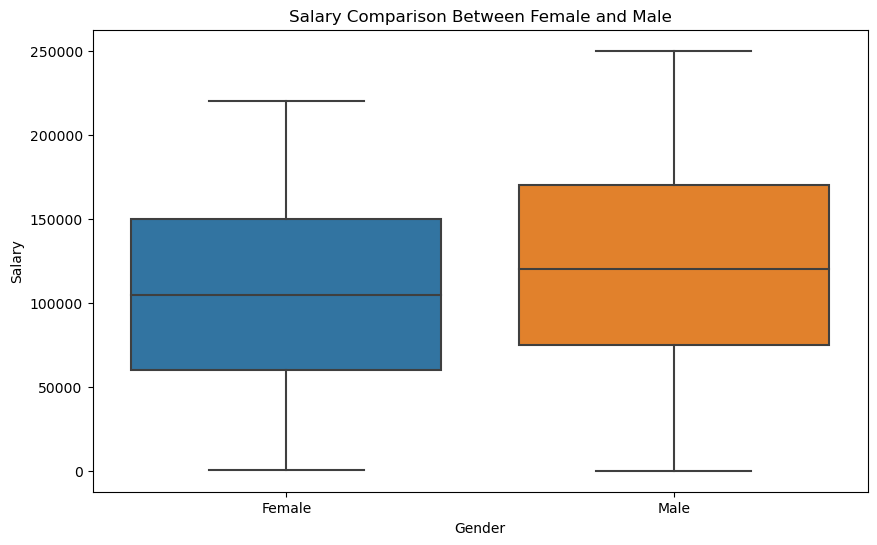

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot oluşturun
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Salary', data= all_gender)
plt.title('Salary Comparison Between Female and Male')
plt.show()

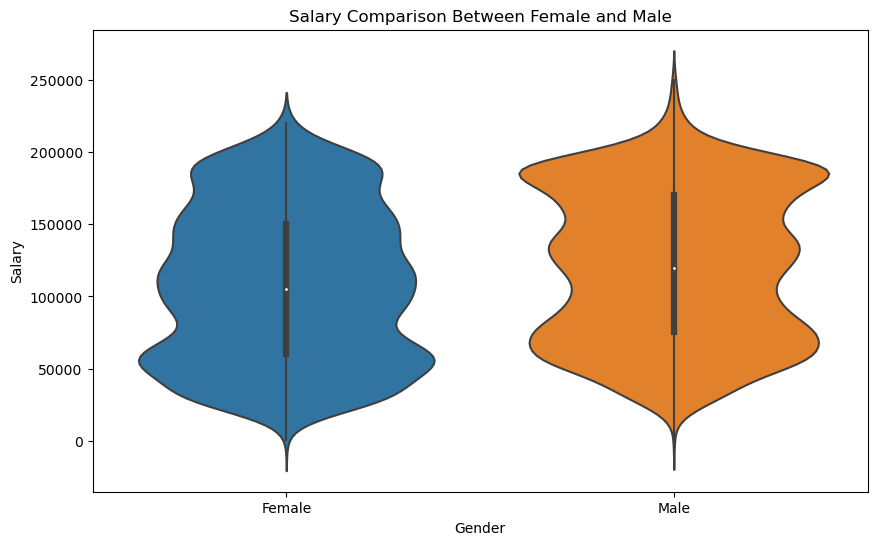

In [14]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Salary', data=all_gender)
plt.title('Salary Comparison Between Female and Male')
plt.show()

## APPLYING t-test

In [15]:
from scipy import stats
t_statistic= stats.ttest_ind(female_df["Salary"], male_df["Salary"])
print(t_statistic)

Ttest_indResult(statistic=-10.489305680117718, pvalue=1.5264743340303035e-25)


This output represents the results of the T-test performed between two independent samples. Here is the interpretation of the output:

T-test statistic (statistic): -10.489305680117718

This value indicates whether the difference between the two groups is statistically significant. When it is a negative value, it indicates that the "female_df" group has a lower average salary than the "male_df" group.
P-value (p-value): 1.5264743340303035e-25

This value is used to evaluate the accuracy of your hypothesis. A small p-value indicates that the difference between the two groups did not occur randomly and was statistically significant. The p-value here is very small (of the order of e-25), indicating very strong statistical evidence.
In conclusion, based on this output, you can comment that there is a statistically significant difference between the "female_df" and "male_df" groups, and women earn lower salaries than men.

## According to t-test

###### The commonly used alpha value is 0.05. In this case, if the p value is less than 0.05, you can reject the hypothesis and conclude that there is a statistically significant difference in the salaries of male and female. However, if the p value is greater than 0.05, you can say that there is no statistically significant difference.

# Conclusion

### Our Ppaluve value is greater than 0.05, thus indicating that female's salaries are often lower than male's.

In [16]:
# PART 2

In [17]:
# HYPOTESIS :İş deneyimi 10 yılın üzerinde olan çalışanlar 10 yılın altındakilere göre daha fazla maaş alır.

In [18]:
less_10_experience = df.loc[df['Years of Experience'] < 10, ['Years of Experience', 'Salary']].copy()

In [19]:
more_10_experience = df.loc[df['Years of Experience'] >= 10, ['Years of Experience', 'Salary']].copy()

In [20]:
from scipy import stats

t_statistic, p_value = stats.ttest_ind(less_10_experience['Salary'], more_10_experience['Salary'])
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -77.74433766699093
P-value: 0.0


This output represents the results of the T-test performed between two independent samples. Here is the interpretation of the output:

T test statistic (T statistic): -77.74433766699093

This value indicates that the difference between the two groups is passed as taken away. When there is a negative value, it indicates that the "less_10_experience" group has a lower average salary than the "more_10_experience" group.
P-value (p-value): 0.0

This value is used to protect your reflection. The p-value indicates that the difference between the two groups is not random and takes away. A P-value of 0.0 indicates very strong evidence.
In conclusion, based on this output, you can comment that there is a targeted difference between the "less_10_experience" and "more_10_experience" groups as observations, and employees with more than 10 years of experience have more salaries on average than 10 periods.

In [21]:
# EXPERIENCE VE SALARY ARASINDAKİ KORELASYON'A BAKARAK ARALARINDA GÜÇLÜ BİR POSİTİVE ETKİ OLDUĞUNU GÖZLEMLERİZ

In [22]:
# Calculate the correlation to see relationship between Years of Experience / Salary

In [23]:
correlation = df['Years of Experience'].corr(df['Salary'])
print(correlation)

0.8089681695139435


#### Correlation: Correlation measures the statistical relationship between two variables. The correlation coefficient is typically denoted as "r" and can take a value between -1 and +1.

In [24]:
## Conclusion: The correlation between experience and salary is very close to 1, indicating a strong link between the two.

# Graph : 

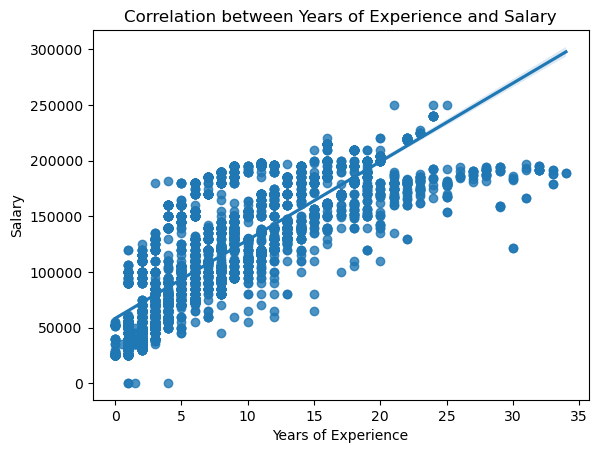

In [25]:
sns.regplot(x='Years of Experience', y='Salary', data=df)
plt.title('Correlation between Years of Experience and Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.show()

In [26]:
#There is a significantly high positive correlation